
### **BELLABEAT CASE STUDY**

How can a wellness technology company play it smart?


##### **ABOUT THE COMPANY**

Bellabeat is a high-tech manufacturer of health-focused products for women. Artist Urška Sršen and Mathematician Sando Mur founded Bellabeat in 2013, to help women assess their daily activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits. By doinging this they collect data throut their products such as:
- _Bellabeat App_: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products
- _Leaf_: A wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.
- _Time_: A wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress through the Bellabeat app.
- _Spring_: A water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day which is also sysnced with the Bellabeat app.
- _Bellabeat memebership_: Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.


##### **BUSINESS TASK**

Make an analysis on the smart device usage data of one of the smart devices in order to gain insight into how consumers use non-Bellabeat smart devices. Identify how these insights could help influence Bellabeat marketing strategy.


#### 1. ASK

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?


#### 2. PREPARE

Urška Sršen insists on making use of use public data that explores smart device users’ daily habits which is available [here](https://www.kaggle.com/arashnic/fitbit). The dataset being used is **FitBit Fitness Tracker Data** (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic))


##### **About the data**

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03/12/2016-05/12/2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

#### 3. PROCESS

#### Loading libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading datasets

In [3]:
daily_activity_df = pd.read_csv('dailyActivity_merged.csv')
sleep_day_df = pd.read_csv('sleepDay_merged.csv')
hourly_calories_df = pd.read_csv('hourlyCalories_merged.csv')
hourly_steps_df = pd.read_csv('hourlySteps_merged.csv')

#### Data Exploration
Having a look at each dataset

In [4]:
daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
sleep_day_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
hourly_calories_df.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [7]:
hourly_steps_df.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


Now checking for more information and column datatypes for each dataset

In [8]:
daily_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [9]:
sleep_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:
hourly_calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [11]:
hourly_steps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


##### Dataset statistics

In [12]:
daily_activity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [13]:
sleep_day_df.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [14]:
hourly_calories_df.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [15]:
hourly_steps_df.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


Checking to see if each dataset has the same amount of unique entries/participants

In [16]:
daily_activity_df.Id.nunique()

33

In [17]:
sleep_day_df.Id.nunique()

24

In [18]:
hourly_calories_df.Id.nunique()

33

In [19]:
hourly_steps_df.Id.nunique()

33

Looking at the _sleep_daily_df_ dataframe, it has less amount of entries compared to the other dataframes, which tells us that perhaps there were participants that did not log all their entries, hence for this reason, I will still make use of the _sleepDay_merged.csv_ dataset.

#### Data cleaning

##### Data formatting

Converting the relavant columns in each data set to the correct datatypes

In [20]:
daily_activity_df["ActivityDate"] = pd.to_datetime(daily_activity_df["ActivityDate"])
sleep_day_df["SleepDay"] = pd.to_datetime(sleep_day_df["SleepDay"])
hourly_calories_df["ActivityHour"] = pd.to_datetime(hourly_calories_df["ActivityHour"])
hourly_steps_df["ActivityHour"] = pd.to_datetime(hourly_steps_df["ActivityHour"])

Renaming datetime columns to be more simple

In [21]:
daily_activity_df = daily_activity_df.rename(columns={"ActivityDate": "Date"})
sleep_day_df = sleep_day_df.rename(columns={"SleepDay": "Date"})
hourly_calories_df = hourly_calories_df.rename(columns={"ActivityHour": "Date_Time"})
hourly_steps_df = hourly_steps_df.rename(columns={"ActivityHour": "Date_Time"})

Checking to see how many missing values are in each dataframe

In [22]:
daily_activity_df.isna().sum()

Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [23]:
sleep_day_df.isna().sum()

Id                    0
Date                  0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [24]:
hourly_calories_df.isna().sum()

Id           0
Date_Time    0
Calories     0
dtype: int64

In [25]:
hourly_steps_df.isna().sum()

Id           0
Date_Time    0
StepTotal    0
dtype: int64

Checking to see how many duplicates are in each dataframe

In [26]:
daily_activity_df.duplicated().sum()

0

In [27]:
sleep_day_df.duplicated().sum()

3

Three duplicates have been found in this dataset, I will remove the duplicates but keep the first occurence

In [28]:
sleep_day_df = sleep_day_df.drop_duplicates(subset=None, keep='first')
sleep_day_df.duplicated().sum()

0

In [29]:
hourly_calories_df.duplicated().sum()

0

In [30]:
hourly_steps_df.duplicated().sum()

0

##### 4. ANALYZE

Combing all datasets together to perform an easier analysis

In [31]:
# Merging daily_activity_df and sleep_day_dfdatasets
merged_daily_data = pd.merge(daily_activity_df, sleep_day_df, on='Id')
merged_daily_data.head()

# Renaming columns for readability
merged_daily_data = merged_daily_data.rename(columns={"Date_x": "Date_Daily","Date_y": "Sleep_Date"})
merged_daily_data.head()

,Id,Date_Daily,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Sleep_Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-13,2,384,407
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-15,1,412,442
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-16,2,340,367
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-17,1,700,712


In [32]:
# Merging hourly_calories_df and hourly_steps_df datasets
merged_hourly_data = pd.merge(hourly_calories_df, hourly_steps_df, on=['Id', 'Date_Time'])
merged_hourly_data.head()

# Renaming columns for readability
merged_hourly_data = merged_hourly_data.rename(columns={"Date_Time_x": "Date","Date_Time_y": "Date_Time"})
merged_hourly_data.head()

,Id,Date_Time,Calories,StepTotal
0,1503960366,2016-04-12 00:00:00,81,373
1,1503960366,2016-04-12 01:00:00,61,160
2,1503960366,2016-04-12 02:00:00,59,151
3,1503960366,2016-04-12 03:00:00,47,0
4,1503960366,2016-04-12 04:00:00,48,0



**Finding out how many record days were logged**


In [33]:
total_days = merged_daily_data['Date_Daily'].max() - merged_daily_data['Date_Daily'].min()
total_days

Timedelta('30 days 00:00:00')


**Analyzing the average amount of minutes when a user uses the smart device when they are very active, fairly active, lightly active and sedentary**


In [34]:
merged_daily_data.agg({'VeryActiveMinutes': ['mean', 'min', 'max'], 'FairlyActiveMinutes': ['mean', 'min', 'max'],	'LightlyActiveMinutes': ['mean', 'min', 'max'],	'SedentaryMinutes': ['mean', 'min', 'max']})

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
mean,23.935779,17.340703,199.848801,799.39148
min,0.000000,0.000000,0.000000,0.00000
max,210.000000,143.000000,518.000000,1440.00000


The average amount of minutes spent using the smart device by users are **17 minutes** when they are fairly active doing intentional vigorous exercise or vigirous activity, whilst **799 minutes** are spent when they are sedentary, which is roughly **13 hours** in total per day. This goes to show that most of the users use their smart device when they are doing unintentional day-to-day activities during the day such as shopping, cleaning, watering plants, taking out the trash etc.


**Analyzing the average amount of minutes when a user uses the smart device when they are asleep**


In [35]:
merged_daily_data.agg({'TotalMinutesAsleep': ['mean', 'min', 'max']})

,TotalMinutesAsleep
mean,419.10277
min,58.00000
max,796.00000


On average users use the smart device for **419 minutes** which is roughly **6 hours** when sleeping.

Based on how long users use the smart device when they are awake and when they are asleep, this on average leaves **5 hours** of the smart device being unused per day.

**Analysing the average amount of calories user's burn** 

In [144]:
merged_daily_data['Calories'].mean()

2322.845319080013


**Analyzing what time users burn the most calories per day**


In [36]:
merged_hourly_data.groupby(merged_hourly_data['Date_Time'].dt.hour)['Calories'].mean()

Date_Time
0      71.805139
1      70.165059
2      69.186495
3      67.538049
4      68.261803
5      81.708155
6      86.996778
7      94.477981
8     103.337272
9     106.142857
10    110.460710
11    109.806904
12    117.197397
13    115.309446
14    115.732899
15    106.637158
16    113.327453
17    122.752759
18    123.492274
19    121.484547
20    102.357616
21     96.056354
22     88.265487
23     77.593577
Name: Calories, dtype: float64

Looking at this, the most active time for users is at 18:00 PM follwed by 17:00 PM


**Analysing which days of the week, users burn the average amount of calories**


In [37]:
merged_hourly_data.groupby(merged_hourly_data['Date_Time'].dt.day_name())['Calories'].mean().sort_values(ascending=False)

Date_Time
Saturday     99.865866
Tuesday      98.617500
Friday       97.784117
Monday       97.053478
Thursday     97.008529
Wednesday    96.874260
Sunday       94.335981
Name: Calories, dtype: float64

**Analysing user's average amount of steps**

In [143]:
merged_daily_data['TotalSteps'].mean()

8107.890265630062

Looking at this analysis Saturday is the most used/active day because that burn the most calories, followed by Tuesday.


**Analysing which days of the week, users make the average amount of steps**


In [38]:
merged_daily_data.groupby(merged_daily_data['Date_Daily'].dt.day_name())['TotalSteps'].mean().sort_values(ascending=False)

Date_Daily
Tuesday      9016.747621
Monday       8644.214330
Saturday     8622.173292
Friday       8231.167385
Wednesday    7833.033804
Thursday     7735.824324
Sunday       6585.467290
Name: TotalSteps, dtype: float64


**Analyzing the most active day of the week when a user uses the smart device when they are awake**


In [39]:
merged_daily_data.agg({'VeryActiveDistance': ['mean','min','max'], 'ModeratelyActiveDistance': ['mean','min','max'], 'LightActiveDistance': ['mean','min','max'], 'SedentaryActiveDistance':['mean','min','max']})	

,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
mean,1.397498,0.730862,3.532016,0.000679
min,0.000000,0.000000,0.000000,0.000000
max,13.400000,6.480000,10.300000,0.110000


This analysis shows how the average distance is **1 mile** what users are very active whereas **4 miles** when users are doing a light activity. This can be used at an advantage by contributing to a marketing strategy, which will be mentioned in the recommandations.

##### 5. SHARE

**Relationship between the burnt Calories and Total Steps per day**

<AxesSubplot:title={'center':'Total Steps by Calories'}, xlabel='TotalSteps', ylabel='Calories'>

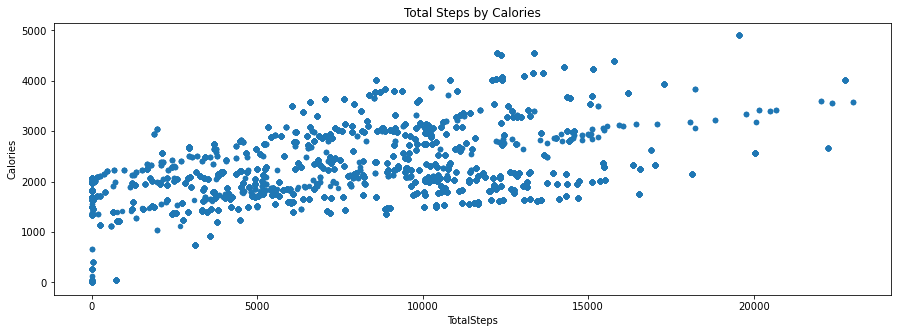

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
merged_daily_data.plot(kind='scatter', x='TotalSteps', y='Calories', title='Total Steps by Calories', ax=ax)

This scatter plot shows a **positive relationship** between the amount of steps or how active they are with the amount of calories that they lose. The relationship shows how the more steps a user makes, the more the calories are burnt.

**Analyzing average amount of calories users burn per day each hour**

Text(0, 0.5, 'Average calories burnt')

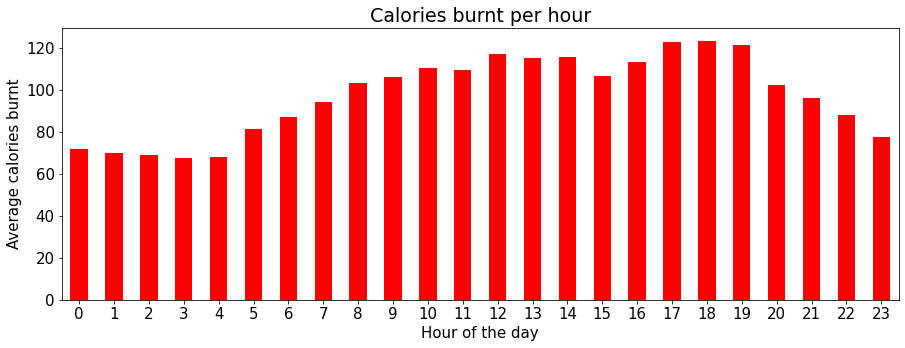

In [147]:
fig, ax = plt.subplots(figsize=(15,5))
merged_hourly_data.groupby(merged_hourly_data['Date_Time'].dt.hour)['Calories'].mean().plot(kind='bar', color='red', fontsize=15, rot=0, ax=ax)
plt.title('Calories burnt per hour', fontsize=19)
ax.set_xlabel('Hour of the day', fontsize = 15)
ax.set_ylabel('Average calories burnt', fontsize = 15)

This bar graph shows us that users begin burning calories between **12:00 PM and 13:00 PM**, as this is normally lunch time for most people, then the level decreases slightly. Although it begins to peak again at it highest reaching **123 calories** between **17:00 PM and 19:00 PM**, which one would see that is the preferred time to workout.

**Analyzing average amount of users' daily total steps**

Text(0, 0.5, 'Average daily steps')

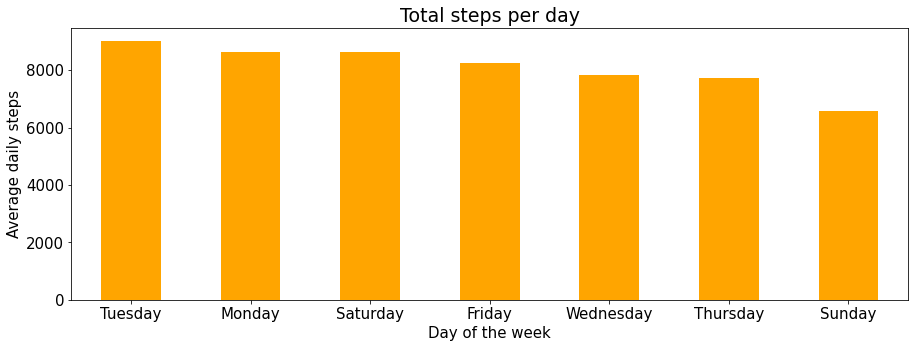

In [126]:
fig, ax = plt.subplots(figsize=(15,5))
merged_daily_data.groupby(merged_daily_data['Date_Daily'].dt.day_name())['TotalSteps'].mean().sort_values(ascending=False).plot(kind='bar', color='orange', fontsize=15, rot=0, ax=ax)
plt.title('Total steps per day', fontsize=19)
ax.set_xlabel('Day of the week', fontsize = 15)
ax.set_ylabel('Average daily steps', fontsize = 15)

This bar graphs shows us that most users walk the most **Tuesday** and **Monday** respectively. This would represent how this is the beginning of a new week hence the large amount of steps taken.

**Analyzing average amount of calories users burn daily**

Text(0, 0.5, 'Average calories burnt')

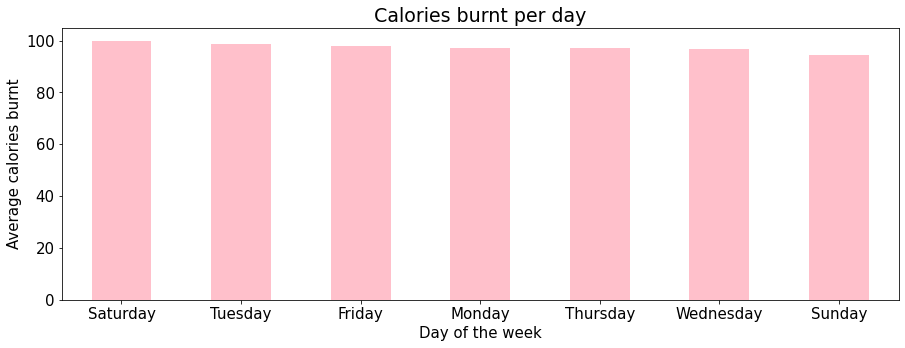

In [145]:
fig, ax = plt.subplots(figsize=(15,5))
merged_hourly_data.groupby(merged_hourly_data['Date_Time'].dt.day_name())['Calories'].mean().sort_values(ascending=False).plot(kind='bar', color='pink', fontsize=15, rot=0, ax=ax)
plt.title('Calories burnt per day', fontsize=19)
ax.set_xlabel('Day of the week', fontsize = 15)
ax.set_ylabel('Average calories burnt', fontsize = 15)

This bar graphs shows us that on average most users burn the most calories on **Saturday** and **Tuesday** respectively. This would represent how Saturday's are mostly designated to working out by users as this is most users free day off from school and/or work.

**Analyzing average minutes users spent doing each activity**

Text(0.5, 1.0, 'Average of Minutes Spent in Each Activity Category')

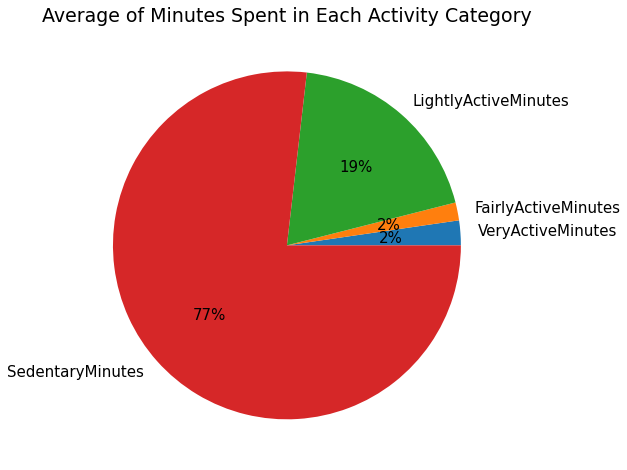

In [112]:
minutes_activities = merged_daily_data[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_activities.plot(kind='pie', ylabel='', fontsize=15, autopct='%1.0f%%', figsize=(10,8))
plt.title('Average of Minutes Spent in Each Activity Category', fontsize=19)

This pie chart tells us that on average users spend **77%** their time being sedentary, meaning users spend their time shopping, cleaning, watering plants, taking out the trash etc and **19%** doing light actvities such as roughly **30 minutes** worth of vigrious exercise when using their smart devices.

##### 6. ACT

The final conclusion based on this analysis that users definitly use their smart devices on a daily basis, for different types of activities whether it's intentional or unintentional activities.

**Key findings:**
- Users walk an average of **8 108** steps while losing **2 323** calories per day.
- Users burn the most calories between **12:00 PM and 13:00 PM** for lunch time for most people, then peaks at it highest between **17:00 PM and 19:00 PM** which would be their preferred time to work out.
- There is a **positive relationship** between the amount of steps and the amount of calories that they lose.
- Users walk the most amount of steps on **Monday's** and **Tuesday's** as this is the beginning of the week.
- Interestingly they burn the most calories on **Tuesday's** and **Saturday's**.
- The analysis shows that **Sunday** had the lowest of the calorie burn and amount of steps. This makes sense as this rest day for many people.
- On average users spend **77%** of their day being sedentary, with at least **19%** doing 30 minutes light activity such as a workout.
- Users useally walk between **1 mile** and **4 miles** daily.



**Recommendations**:

Based on these findings, these insights could help influence Bellabeat's marketing strategy by:

**Awareness**
- Creating a 5 mile walk/run event to promote an active lifestyle, encouraging current and potential customers to at whatever level activity.

**Wellness products**
- On the Bellabeat app offer a section of different workout plans that users can do at an place any any time that they chose. This feature will encourage and increase daily steps and calorie burn.
- On the app offer daily alerts to remind to make healtheir active choices. An example is to alert users to rather take the stairs versus using the lift etc.

**Incentives**
- The users' average of total steps is 8 108 – whilst the recommended daily steps are 10,000. To increase users's daily steps Bellabeat could introduce a step challenge with an prize as an incentive.
- Create a private anonymous community for the users, to encourage supporting for each other's journey. Whoever has the most impact within the community gets a prize as an incentive.

**Weekly and Monthly Achievement Reports**
- Offer user's weekly and monthly reports accoring to their activity, sleep, stress, menstrual cycle, and mindfulness habits.

